# **Prerequisite Test (ES 335)**

In [73]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
import sympy as sp

**1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.**

To multiply a (n, k) matrix A with a (k, m) matrix B, the result is a (n, m) matrix C.

**$ C[i][j] = A[i][0]*B[0][j] + A[i][1]*B[1][j] + ... + A[i][k-1]*B[k-1][j] $**

For each of the n*m elements in C, we perform k multiplications and (k-1) additions.

Therefore:
- Total multiplications: n * m * k
- Total additions: n * m * (k - 1)

In summary, matrix multiplication between (n, k) and (k, m) matrices requires **n*m*k** multiplications and **n*m*(k-1)** additions.


**2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?**

In [74]:
A = [
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
]

B = [
    [2, 3],
    [4, 5],
    [6, 7],
    [8, 9]
]

In [75]:
def matrix_mul(A, B):
    n = len(A)
    k = len(A[0])
    m = len(B[0])
    
    C = [[0 for _ in range(m)] for _ in range(n)]
    for i in range(n):
        for j in range(m):
            for l in range(k):
                C[i][j] += A[i][l] * B[l][j]
    return C

In [88]:
start = time.time()
C_list = matrix_mul(A, B)

print("List of lists result:")
print(C_list)
end = time.time()
print(f"Time taken : {end - start:.6f} seconds")

List of lists result:
[[60, 70], [140, 166], [220, 262]]
Time taken : 0.000471 seconds


In [89]:
A_np = np.array(A)
B_np = np.array(B)

start = time.time()
C_np = np.dot(A_np, B_np)
end = time.time()

print("\nNumpy result:")
print(C_np)
print(f"Time taken: {end - start:.6f} seconds")


Numpy result:
[[ 60  70]
 [140 166]
 [220 262]]
Time taken: 0.000130 seconds


**Numpy is faster as in numpy all element of same data type are stored together whereas in list it is stores randomly. Thus it becomes faster to access elements in a numpy array as they are stored together.**

**3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?**

In [90]:
arr = np.random.randint(1, 1000, 100)

##### **Method 1**

In [57]:
start = time.time()

sorted_arr = []
used_idx = [0 for _ in range(100)]
for i in range(100):
    mx = -1
    mx_idx = -1
    for j in range(100):
        if used_idx[j] == 1:
            continue
        if arr[j] >= mx:
            mx = arr[j]
            mx_idx = j
    used_idx[mx_idx] = 1
    sorted_arr.append(mx)

med = (sorted_arr[49] + sorted_arr[50])/2

end = time.time()

print(med)
print(f"Time taken: {end - start:.6f} seconds")


476.0
Time taken: 0.003520 seconds


##### **Method 2**


In [108]:
start = time.time()

sorted_arr = sorted(arr);
med = (sorted_arr[49] + sorted_arr[50])/2

print(med)
end = time.time()

print(f"Time taken: {end - start:.6f} seconds")

541.0
Time taken: 0.002305 seconds


##### **Method 3**

In [109]:
start = time.time()
med = np.median(arr)
end = time.time()

print(med)
print(f"Time taken: {end - start:.6f} seconds.")

541.0
Time taken: 0.002209 seconds.


##### **Time Complexity**

Time complexity of Method 1 is O($ n^2 $) as we used 2 for loops of n operations each to first find the maximum element each time.

Where as in Method 2, I used in-built sorting function which sort the array in O($ n*log(n) $) time.

Using `numpy.median()` is the fastest.

**4. What is the gradient of the following function with respect to \( x \) and \( y \)?**

**$f(x, y) = x^3 y + y^3 \sin(x)$**


**Gradient wrt x :** $ \frac{d f(x, y)}{dx} = 3*x^2*y + x^3*\frac{dy}{dx} + 3*y^2*\frac{dy}{dx}*\sin(x) + y^3*\cos(x) $

**Gradient wrt y :** $ \frac{d f(x, y)}{dy} = 3*x^2*\frac{dx}{dy} + x^3 + 3*y^2*\sin(x) + y^3*\cos(x)*\frac{dx}{dy} $


**5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y**

In [110]:
def f(x, y):
    return x**3 * y + y**3 * jnp.sin(x)

def grad_analytical(x, y):
    df_dx = 3 * x**2 * y + y**3 * jnp.cos(x)
    df_dy = x**3 + 3 * y**2 * jnp.sin(x)
    return df_dx, df_dy

grad_f = jax.grad(f, argnums=(0, 1))

key = jax.random.PRNGKey(0)
xs = jax.random.uniform(key, (5,), minval=0.5, maxval=5.0)
ys = jax.random.uniform(key+1, (5,), minval=0.5, maxval=5.0)

for i in range(5):
    x = xs[i]
    y = ys[i]
    grad_jax = grad_f(x, y)
    grad_ana = grad_analytical(x, y)
    print(f"x = {float(x):.4f}, y = {float(y):.4f}")
    print(f"  JAX grad:        df/dx = {float(grad_jax[0]):.6f}, df/dy = {float(grad_jax[1]):.6f}")
    print(f"  Analytical grad: df/dx = {float(grad_ana[0]):.6f}, df/dy = {float(grad_ana[1]):.6f}")
    print(f"  Difference:      dx = {abs(float(grad_jax[0]) - float(grad_ana[0])):.2e},      dy = {abs(float(grad_jax[1]) - float(grad_ana[1])):.2e}")
    print("-" * 60)


x = 4.7645, y = 3.6890
  JAX grad:        df/dx = 253.839279, df/dy = 67.386307
  Analytical grad: df/dx = 253.839279, df/dy = 67.386307
  Difference:      dx = 0.00e+00,      dy = 0.00e+00
------------------------------------------------------------
x = 4.9036, y = 4.1141
  JAX grad:        df/dx = 310.013947, df/dy = 68.056023
  Analytical grad: df/dx = 310.013947, df/dy = 68.056023
  Difference:      dx = 0.00e+00,      dy = 0.00e+00
------------------------------------------------------------
x = 1.9953, y = 3.0044
  JAX grad:        df/dx = 24.714226, df/dy = 32.619499
  Analytical grad: df/dx = 24.714226, df/dy = 32.619499
  Difference:      dx = 0.00e+00,      dy = 0.00e+00
------------------------------------------------------------
x = 2.6090, y = 2.8637
  JAX grad:        df/dx = 38.247070, df/dy = 30.251270
  Analytical grad: df/dx = 38.247070, df/dy = 30.251270
  Difference:      dx = 0.00e+00,      dy = 0.00e+00
------------------------------------------------------------


**6. Use sympy to confirm that you obtain the same gradient analytically.**

In [111]:
x_sym, y_sym = sp.symbols('x y')
f_sym = x_sym**3 * y_sym + y_sym**3 * sp.sin(x_sym)

df_dx_sym = sp.diff(f_sym, x_sym)
df_dy_sym = sp.diff(f_sym, y_sym)

print("Gradient wrt x:", df_dx_sym)
print("Gradient wrt y:", df_dy_sym)

Gradient wrt x: 3*x**2*y + y**3*cos(x)
Gradient wrt y: x**3 + 3*y**2*sin(x)


7. **Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:**

    1. 2022
        1. Branch 1
            1. Roll Number: 1, Name: N, Marks:
                1.Maths: 100, English: 70 …
        2. Branch 2
    2. 2023
        1. Branch 1
        2. Branch 2
    3. 2024
        1. Branch 1
        2. Branch 2
    4. 2025
        1. Branch 1
        2. Branch 2 

In [112]:
students = {
    '2024': {
        'Branch 1': [
            {
                'roll': 1, 
                'name': 'Virat Kohli', 
                'marks': {'Maths': 95, 'English': 88}
            },
            {
                'roll': 2,
                'name': 'Rohit Sharma', 
                'marks': {'Maths': 78, 'English': 82}
            }
        ],
        'Branch 2': [
            {
                'roll': 3, 
                'name': 'Jasprit Bumrah', 
                'marks': {'Maths': 85, 'English': 90}
            }
        ]
    },
    '2025': {
        'Branch 1': [
            {
                'roll': 4, 
                'name': 'Hardik Pandya', 
                'marks': {'Maths': 92, 'English': 80}
            }
        ],
        'Branch 2': [
            {
                'roll': 5, 
                'name': 'Ravindra Jadeja', 
                'marks': {'Maths': 88, 'English': 91}
            }
        ]
    }
}

**8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.**

In [113]:
class Student:
    def __init__(self, roll, name, marks):
        self.roll = roll
        self.name = name
        self.marks = marks
    def __repr__(self):
        return f"Student(roll={self.roll}, name='{self.name}', marks={self.marks})"

class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []
    def add_student(self, student):
        self.students.append(student)
    def __repr__(self):
        return f"Branch(name='{self.name}', students={self.students})"

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []
    def add_branch(self, branch):
        self.branches.append(branch)
    def __repr__(self):
        return f"Year(year={self.year}, branches={self.branches})"


db = []
year2024 = Year(2024)
branch1_2024 = Branch('Branch 1')
branch1_2024.add_student(Student(1, 'Virat Kohli', {'Maths': 95, 'English': 88}))
branch1_2024.add_student(Student(2, 'Rohit Sharma', {'Maths': 78, 'English': 82}))
branch2_2024 = Branch('Branch 2')
branch2_2024.add_student(Student(3, 'Hardik Pandya', {'Maths': 85, 'English': 90}))
year2024.add_branch(branch1_2024)
year2024.add_branch(branch2_2024)
db.append(year2024)

for branch in db[0].branches:
    if branch.name == 'Branch 1':
        for student in branch.students:
            print(student)

Student(roll=1, name='Virat Kohli', marks={'Maths': 95, 'English': 88})
Student(roll=2, name='Rohit Sharma', marks={'Maths': 78, 'English': 82})


**9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5**

1. $ y = x $
2. $ y = x^2 $
3. $ y = \frac{x^3}{100} $
4. $ y = \sin(x) $
5. $ y = \frac{\sin(x)}{x} $
6. $ y = \log(x) $
7. $ y = e^x $

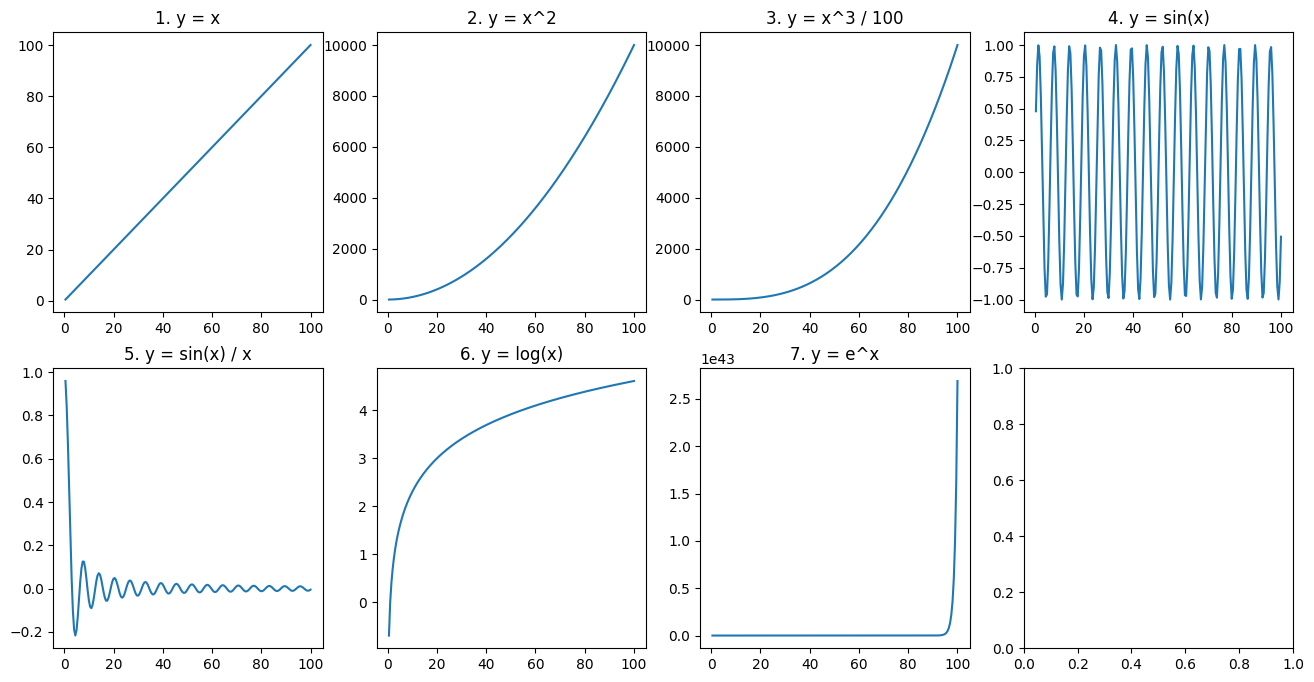

In [114]:
x = np.arange(0.5, 100.5, 0.5)
fig, axs = plt.subplots(2, 4, figsize=(16, 8))

y = x;
axs[0, 0].plot(x, y)
axs[0, 0].set_title("1. y = x")

y = x*x
axs[0, 1].plot(x, y)
axs[0, 1].set_title("2. y = x^2")

y = x**3 / 100
axs[0, 2].plot(x, y)
axs[0, 2].set_title("3. y = x^3 / 100")

y = np.sin(x)
axs[0, 3].plot(x, y)
axs[0, 3].set_title("4. y = sin(x)")

y = np.sin(x) / x
axs[1, 0].plot(x, y)
axs[1, 0].set_title("5. y = sin(x) / x")

y = np.log(x)
axs[1, 1].plot(x, y)
axs[1, 1].set_title("6. y = log(x)")

y = np.exp(x)
axs[1, 2].plot(x, y)
axs[1, 2].set_title("7. y = e^x")

plt.show()

**10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.**

In [115]:
matrix = np.random.uniform(1, 2, (20, 5))

column_names = ["a", "b", "c", "d", "e"]
df = pd.DataFrame(data = matrix, columns = column_names)
df.head()

,a,b,c,d,e
0,1.508360,1.892552,1.687326,1.954149,1.120419
1,1.395211,1.533500,1.099662,1.876820,1.868127
2,1.777393,1.637706,1.413548,1.389703,1.813834
3,1.087978,1.842218,1.305356,1.346820,1.333159
4,1.125016,1.919714,1.087453,1.742074,1.898070


In [116]:
column_std = df.std()
highest_std_column = column_std.idxmax()
print(f"Column with the highest standard deviation: '{highest_std_column}'")

Column with the highest standard deviation: 'e'


In [117]:
row_mean = df.mean(axis=1)
lowest_mean_row_index = row_mean.idxmin()
print(f"Row with the lowest mean is at index: {lowest_mean_row_index}")

Row with the lowest mean is at index: 11


**11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.**

In [118]:
df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')
df.head()

,a,b,c,d,e,f,g
0,1.508360,1.892552,1.687326,1.954149,1.120419,8.162806,GT8
1,1.395211,1.533500,1.099662,1.876820,1.868127,7.773320,LT8
2,1.777393,1.637706,1.413548,1.389703,1.813834,8.032184,GT8
3,1.087978,1.842218,1.305356,1.346820,1.333159,6.915530,LT8
4,1.125016,1.919714,1.087453,1.742074,1.898070,7.772328,LT8


In [119]:
lt8_cnt = (df['g'] == 'LT8').sum()
print(f"Number of rows where 'g' is 'LT8': {lt8_cnt}")

Number of rows where 'g' is 'LT8': 13


In [120]:
std_by_g = df.groupby('g')['f'].std()
print(std_by_g)

g
GT8    0.157468
LT8    0.579556
Name: f, dtype: float64


**12. Write a small piece of code to explain broadcasting in numpy.**

In [121]:
a = np.array([
    [1, 2, 3],
    [4, 5, 6]
])

b = np.array([10, 11, 12])

result_scalar = a + b

print("--- Example 1: Broadcasting a Scalar ---")
print("Original array 'a':\n", a)
print("\nResult of 'a + 10':\n", result_scalar)

--- Example 1: Broadcasting a Scalar ---
Original array 'a':
 [[1 2 3]
 [4 5 6]]

Result of 'a + 10':
 [[11 13 15]
 [14 16 18]]


**13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.**

In [122]:
def find_argmin(arr):
    idx = 0
    for i in range(len(arr)):
        if(arr[i] < arr[idx]):
            idx = i
        
    return idx

In [123]:
arr = np.array([5, 12, 3, 8, 20, 3, 9])
print(f"Test Array: {arr}")

my_argmin_result = find_argmin(arr)
print(f"My function's result: {my_argmin_result}")

numpy_argmin_result = np.argmin(arr)
print(f"NumPy's np.argmin() result: {numpy_argmin_result}")

Test Array: [ 5 12  3  8 20  3  9]
My function's result: 2
NumPy's np.argmin() result: 2
